In [1]:
!pip install opendatasets --upgrade --user

In [2]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [7]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020\survey_results_public.csv')

In [8]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [9]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [10]:
schema_raw = pd.read_csv('stackoverflow-developer-survey-2020\survey_results_schema.csv', index_col = 'Column').QuestionText

In [11]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [12]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [13]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [14]:
len(selected_columns)

20

In [15]:
survey_df = survey_raw_df[selected_columns].copy()

In [16]:
schema = schema_raw[selected_columns]

In [17]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [18]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [19]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [20]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [21]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [22]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [23]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [24]:
survey_df['Gender'].value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [25]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
21112,New Zealand,18.0,"Non-binary, genderqueer, or gender non-conforming","Secondary school (e.g. American high school, G...",NaN,Yes,9.0,9.0,NaN,HTML/CSS;JavaScript;Python;SQL,C++;Go;HTML/CSS;JavaScript;R;SQL,NaN,Visit Stack Overflow,"Not employed, but looking for work","Database administrator;Designer;Developer, bac...",NaN,NaN,Diversity of the company or organization;Flex ...,NaN,Fairly important
44348,Germany,NaN,Woman,"Secondary school (e.g. American high school, G...",NaN,No,NaN,NaN,NaN,Java,Java,Once a year,Call a coworker or friend;Visit Stack Overflow...,NaN,NaN,40.0,Very satisfied,NaN,NaN,Not at all important/not necessary
61297,United States,29.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,12.0,3.0,NaN,C#;Dart;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;JavaScript;SQL,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Never,Somewhat important
6805,Australia,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,10.0,13.0,1.0,HTML/CSS;Java;JavaScript;TypeScript,C++;HTML/CSS;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",38.0,Slightly satisfied,Industry that I’d be working in;Diversity of t...,Rarely: 1-2 days per year or less,Somewhat important
6751,India,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,16.0,6.0,4.0,Bash/Shell/PowerShell;Python;R;SQL;VBA,Go;Scala,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data or business analyst;Data scientist or mac...,10.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
2536,Turkey,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,26.0,3.0,1.0,Dart;Java;Python,C;Dart;Go;Kotlin;Python;Rust,Once a year,Play games;Visit Stack Overflow;Go for a walk ...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, front-end;Devel...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
49177,Canada,42.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,8.0,25.0,20.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby,Once a year,Watch help / tutorial videos,Employed full-time,"Developer, back-end;Developer, full-stack;DevO...",30.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Somewhat important
4647,Dominican Republic,33.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,20.0,13.0,10.0,Go;HTML/CSS;Java;JavaScript;Kotlin,Go;HTML/CSS;Java;JavaScript;Kotlin;Perl;Python...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
58314,Pakistan,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,22.0,3.0,2.0,HTML/CSS;JavaScript;PHP;Python;SQL,Assembly;C#;Swift,Every few months,Meditate;Visit Stack Overflow;Panic,Employed full-time,"Database ad

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [27]:
schema.Country

'Where do you live?'

In [28]:
survey_df.Country.nunique()

183

In [29]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

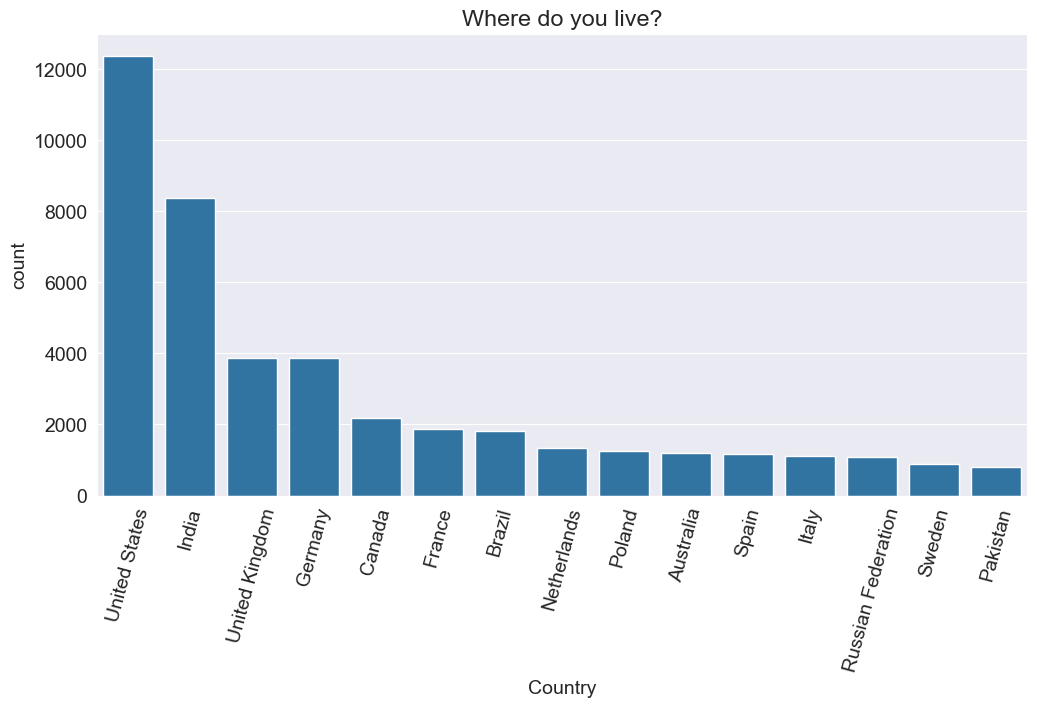

In [30]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(x = top_countries.index, y= top_countries);

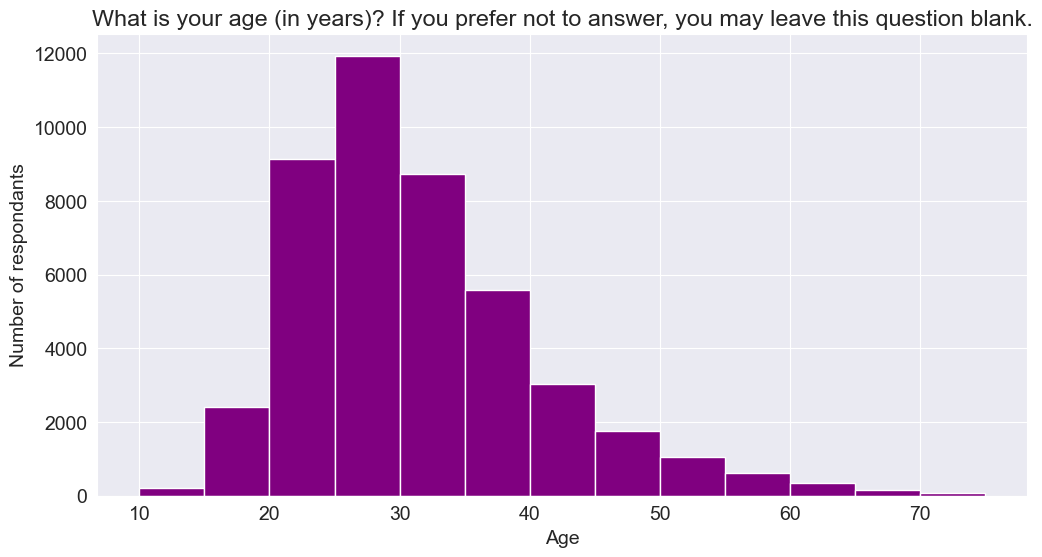

In [31]:
plt.figure(figsize = (12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondants')
plt.hist(survey_df.Age, bins = np.arange(10,80,5), color = 'purple');

In [32]:
gender_counts = survey_df.Gender.value_counts(dropna = False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

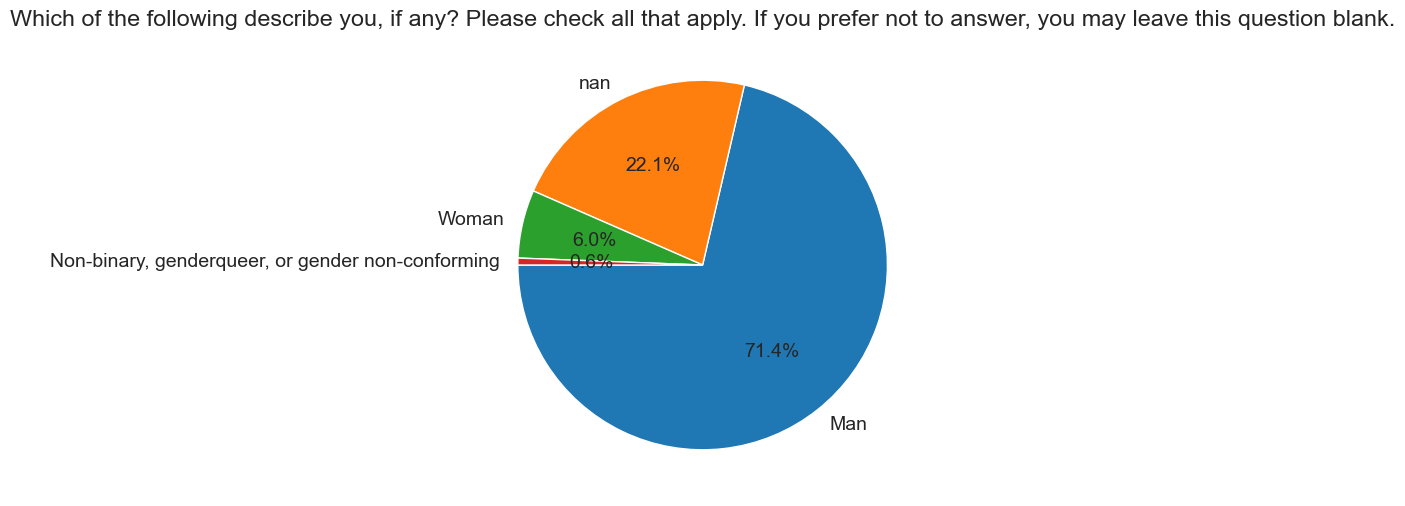

In [33]:
plt.figure(figsize = (12, 6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 180);

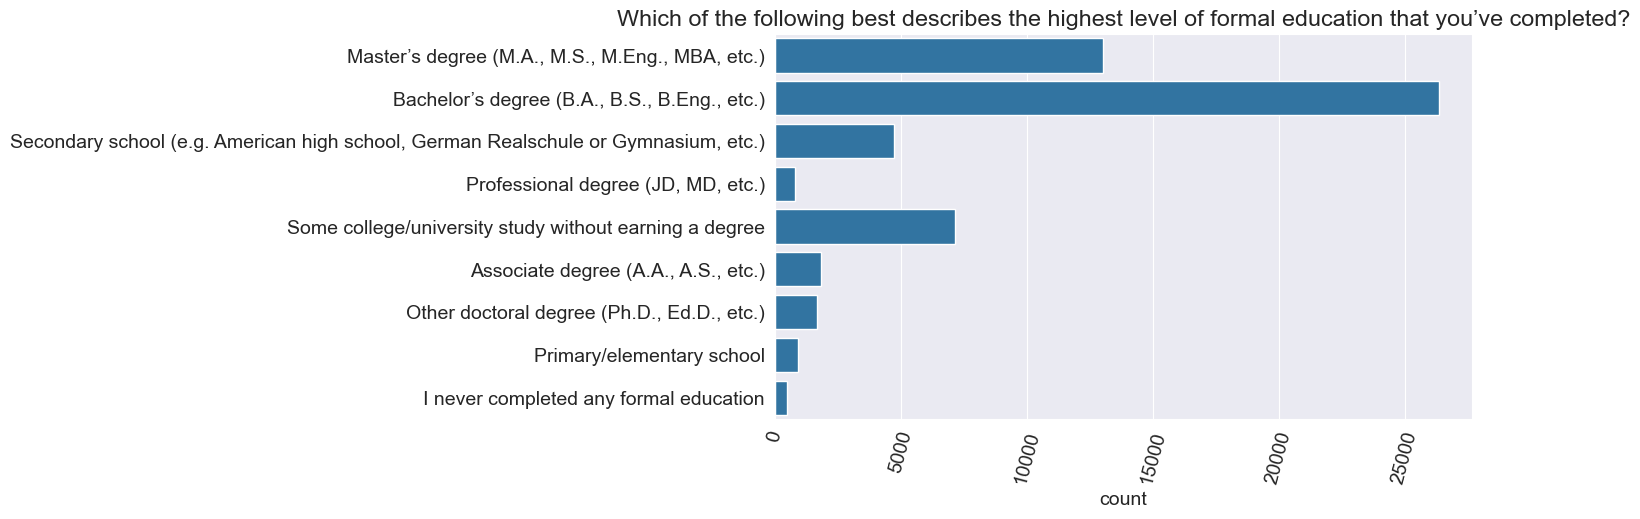

In [34]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation = 75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Text(0.5, 0, 'Percentage')

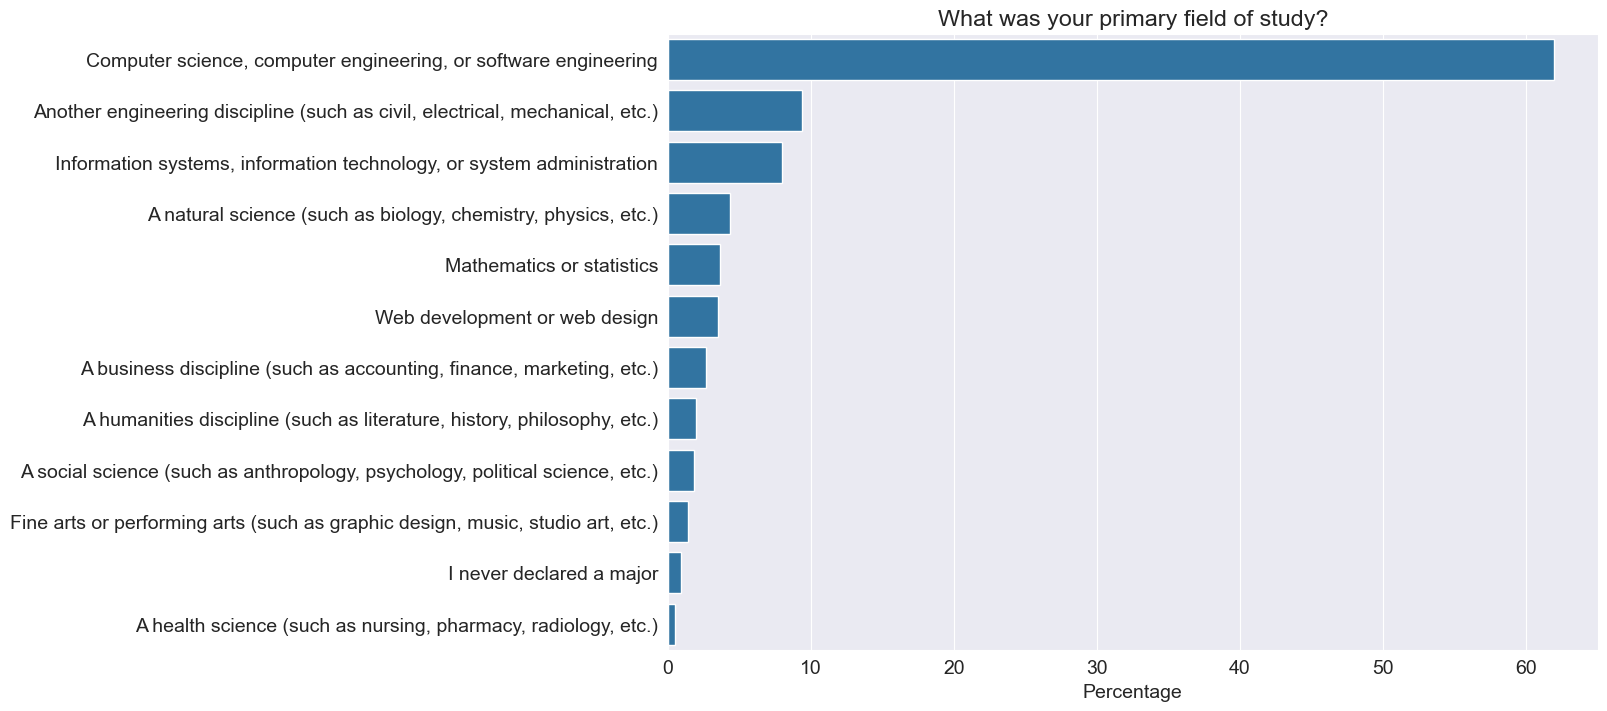

In [35]:
plt.figure(figsize = (12,8))
undergrad_pct = survey_df.UndergradMajor.value_counts()*100 / survey_df.UndergradMajor.count()
sns.barplot(x= undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')

In [36]:
schema.Employment

'Which of the following best describes your current employment status?'

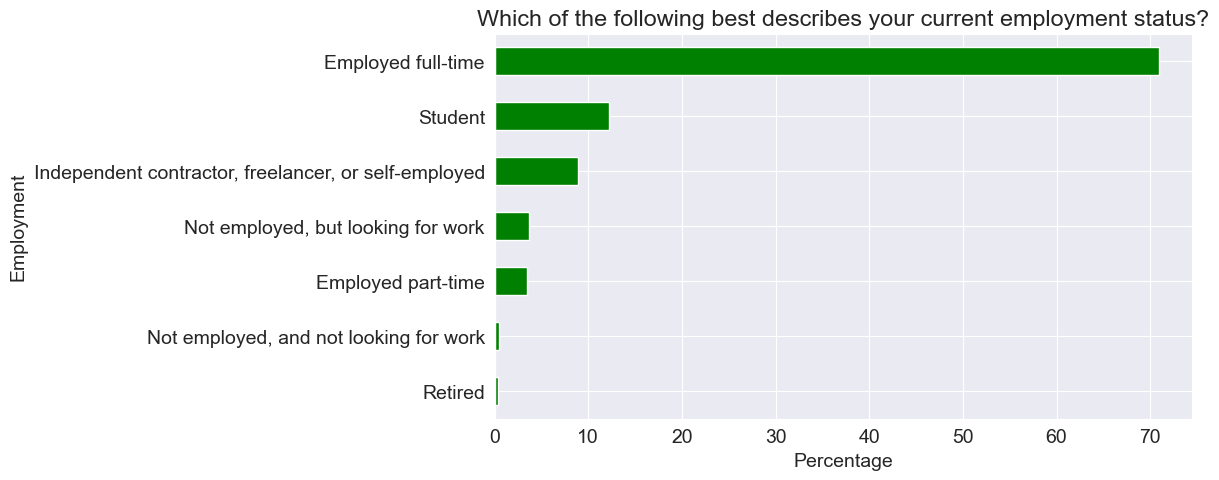

In [37]:
(survey_df.Employment.value_counts(normalize = True, ascending = True)*100).plot(kind = 'barh', color = 'g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [38]:
survey_df.DevType.to_frame()

,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
64456,Senior executive/VP
64457,NaN
64458,NaN
64459,NaN


In [39]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [40]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df 

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)

In [44]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [43]:
# asking and answering questions
# which were the most popular languages in 2020?
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [46]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [47]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending = False) * 100

In [49]:
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

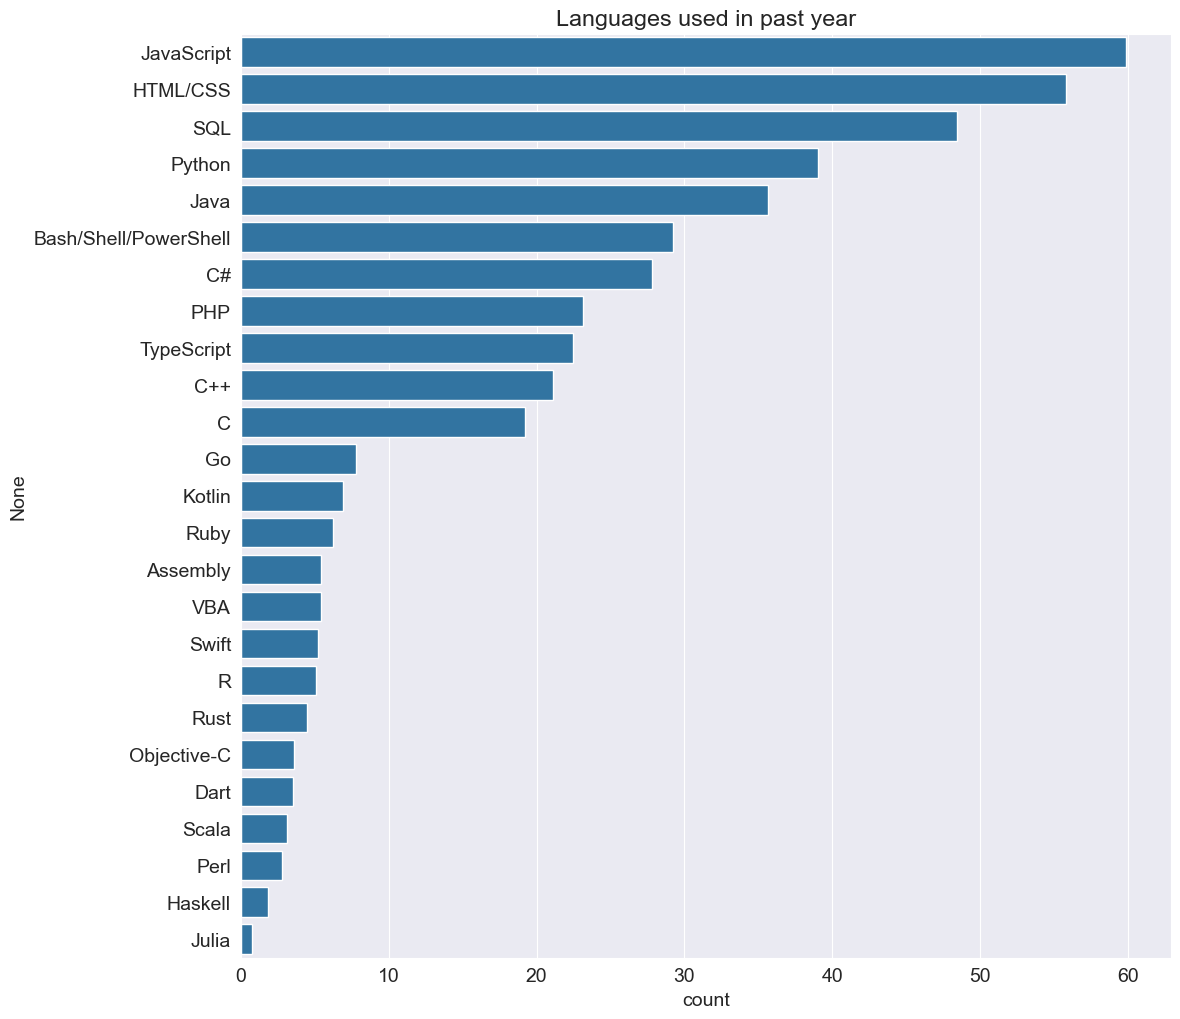

In [51]:
plt.figure(figsize = (12, 12))
sns.barplot(x = languages_worked_percentages, y= languages_worked_percentages.index)
plt.title('Languages used in past year')
plt.xlabel('count');

In [53]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending = False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

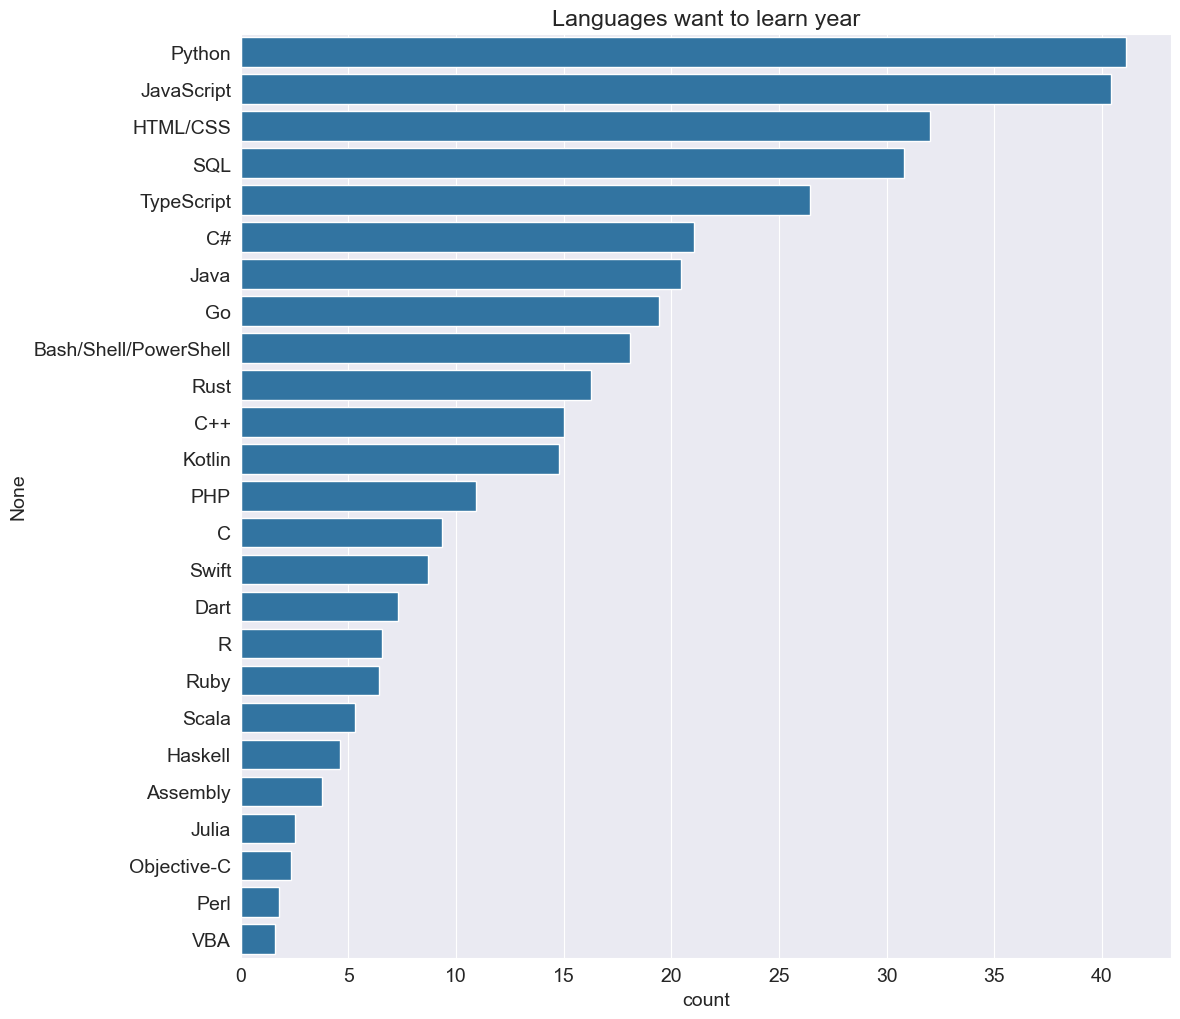

In [54]:
plt.figure(figsize = (12, 12))
sns.barplot(x = languages_interested_percentages, y= languages_interested_percentages.index)
plt.title('Languages want to learn year')
plt.xlabel('count');

In [55]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending = False)

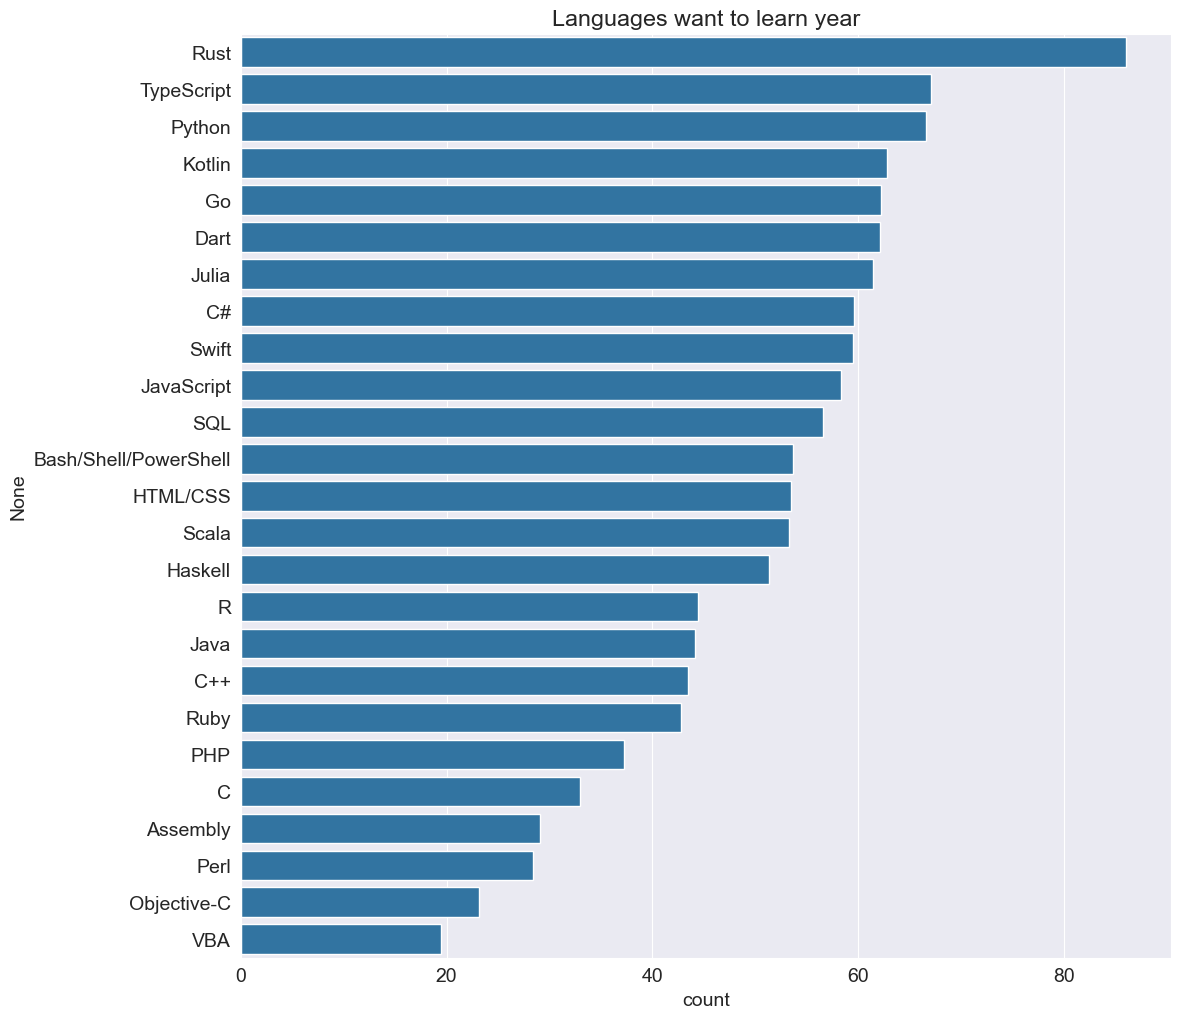

In [57]:
plt.figure(figsize = (12, 12))
sns.barplot(x = languages_loved_percentages, y= languages_loved_percentages.index)
plt.title('Languages want to learn year')
plt.xlabel('count');

In [61]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending = False)

In [62]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

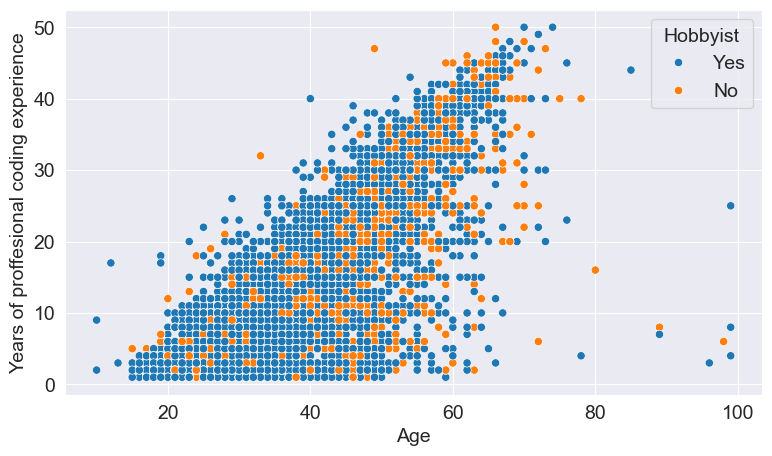

In [65]:
# how important is it to start young to build a career in programming
sns.scatterplot(x= 'Age', y= 'YearsCodePro', hue = 'Hobbyist', data = survey_df)
plt.xlabel('Age')
plt.ylabel('Years of proffesional coding experience'); 